[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


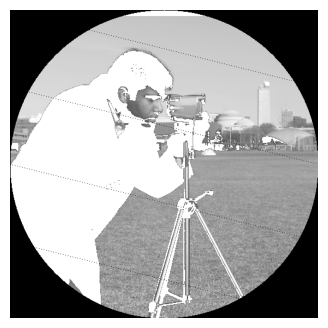

In [5]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
print(camera)
camera[:10] = 0
mask = camera < 87
camera[mask] = 255
inds_x = np.arange(len(camera))
inds_y = (4 * inds_x) % len(camera)
camera[inds_x, inds_y] = 0

l_x, l_y = camera.shape[0], camera.shape[1]
X, Y = np.ogrid[:l_x, :l_y]
outer_disk_mask = (X - l_x / 2)**2 + (Y - l_y / 2)**2 > (l_x / 2)**2
camera[outer_disk_mask] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap='gray')
plt.axis('off')
plt.show()

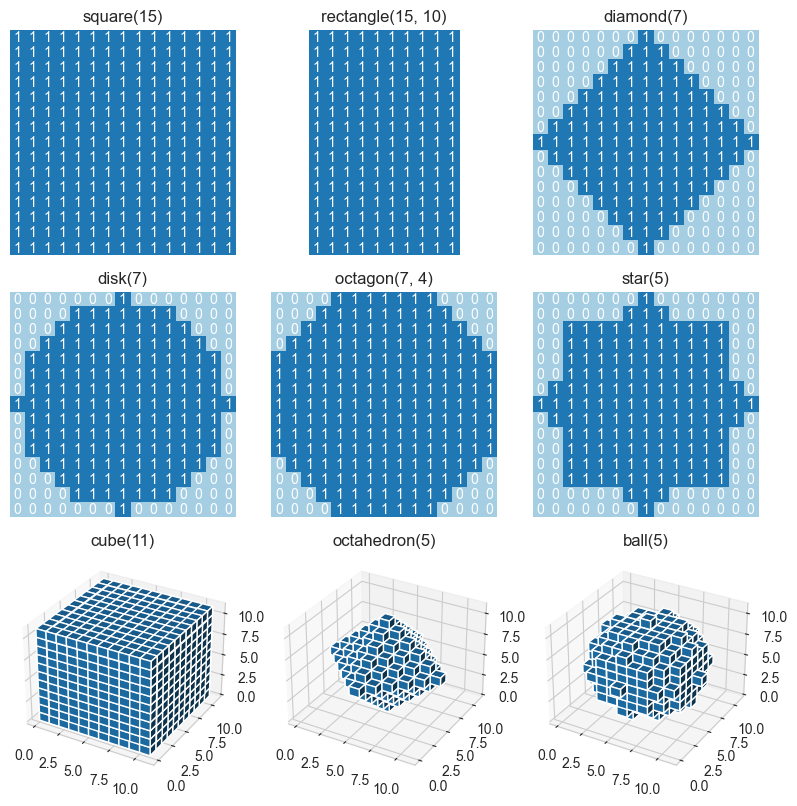

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

# Generate 2D and 3D structuring elements.
struc_2d = {
    "square(15)": square(15),
    "rectangle(15, 10)": rectangle(15, 10),
    "diamond(7)": diamond(7),
    "disk(7)": disk(7),
    "octagon(7, 4)": octagon(7, 4),
    "star(5)": star(5)
}

struc_3d = {
    "cube(11)": cube(11),
    "octahedron(5)": octahedron(5),
    "ball(5)": ball(5)
}

# Visualize the elements.
fig = plt.figure(figsize=(8, 8))

idx = 1
for title, struc in struc_2d.items():
    ax = fig.add_subplot(3, 3, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax.text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax.set_axis_off()
    ax.set_title(title)
    idx += 1

for title, struc in struc_3d.items():
    ax = fig.add_subplot(3, 3, idx, projection=Axes3D.name)
    ax.voxels(struc)
    ax.set_title(title)
    idx += 1

fig.tight_layout()
plt.show()

[array([[9.93902734, 0.        ],
       [9.86521017, 1.        ],
       [9.63842842, 2.        ],
       [9.24067178, 3.        ],
       [9.        , 3.42487608],
       [8.64744355, 4.        ],
       [8.        , 4.80005934],
       [7.80754532, 5.        ],
       [7.        , 5.71101032],
       [6.56942992, 6.        ],
       [6.        , 6.3556701 ],
       [5.        , 6.79944214],
       [4.31568262, 7.        ],
       [4.        , 7.09578373],
       [3.        , 7.28305412],
       [2.        , 7.37835474],
       [1.        , 7.41346629],
       [0.        , 7.41849616]]), array([[ 0.        , 42.09146193],
       [ 1.        , 42.09626078],
       [ 2.        , 42.12974181],
       [ 3.        , 42.2204602 ],
       [ 4.        , 42.39806193],
       [ 5.        , 42.69644371],
       [ 5.67419922, 43.        ],
       [ 6.        , 43.14925559],
       [ 7.        , 43.78701929],
       [ 7.25798509, 44.        ],
       [ 8.        , 44.69827902],
       [ 8.2662019

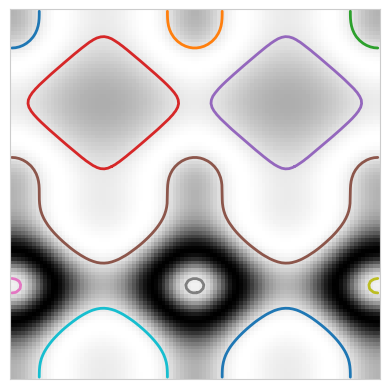

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
# print(r)
# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)
print(contours)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()